In [34]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pygame

In [35]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [36]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [37]:
def draw_landmarks(image, results):
#     FACE_connections has been renamed to facemesh_contours
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [38]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [39]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [41]:
draw_landmarks(frame, results)

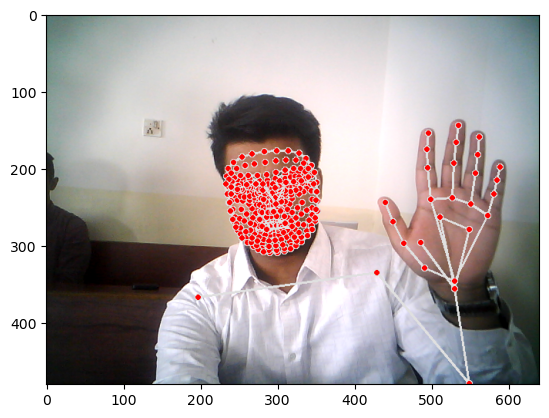

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [42]:
len(results.left_hand_landmarks.landmark)
len(results.left_hand_landmarks.landmark)


21

In [43]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [44]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [45]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [46]:
result_test = extract_keypoints(results)

In [47]:
result_test

array([ 0.44648084,  0.51783401, -0.74890172, ...,  0.        ,
        0.        ,  0.        ])

In [48]:
468*3+33*4+21*3+21*3

1662

In [49]:
np.save('0', result_test)

In [50]:
np.load('0.npy')

array([ 0.44648084,  0.51783401, -0.74890172, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
# actions = np.array(['hello', 'thanks', 'yes'])


In [31]:
# import os


In [51]:
import os
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'yes'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [52]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [53]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [54]:
label_map = {label:num for num, label in enumerate(actions)}


In [55]:
label_map = {label:num for num, label in enumerate(actions)}


In [56]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [57]:
np.array(sequences).shape


(90, 30, 1662)

In [58]:
np.array(labels).shape


(90,)

In [59]:
X = np.array(sequences)


In [60]:
X.shape


(90, 30, 1662)

In [61]:
y = to_categorical(labels).astype(int)


In [62]:
y


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [64]:
y_test.shape


(5, 3)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [66]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)


In [67]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [68]:
res = [.7, 0.2, 0.1]


In [69]:
actions[np.argmax(res)]


'hello'

In [70]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [33]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])


NameError: name 'X_train' is not defined

In [66]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [80]:
res = model.predict(X_test)


1/1 [==============================] - 0s 26ms/step


In [81]:
actions[np.argmax(res[2])]


'thanks'

In [82]:
actions[np.argmax(y_test[2])]


'thanks'

In [83]:
actions[np.argmax(res[0])]


'yes'

In [84]:
actions[np.argmax(y_test[0])]


'yes'

In [85]:
actions[np.argmax(res[4])]


'yes'

In [86]:
actions[np.argmax(y_test[4])]


'yes'

In [60]:
# model.save('action3124114134.h5')


In [24]:
del model

In [87]:
model.load_weights('action_new.h5')


In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [89]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [90]:
yhat = model.predict(X_test)


1/1 [==============================] - 0s 20ms/step


In [91]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [92]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [93]:
accuracy_score(ytrue, yhat)


1.0

In [94]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [95]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

# TTS all three words working

In [98]:
# pip install pygame


In [96]:
import cv2
import mediapipe as mp
import numpy as np
from gtts import gTTS
import os
import pygame

# Initialize the audio mixer
pygame.mixer.init()

# Define a dictionary of words and their corresponding text
word_text = {
    "hello": "Hello",
    "thanks": "Thanks",  # Corrected to match the dictionary
    "yes": "Yes"
}

# Set the output directory for audio files
output_directory = "audio_files"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Generating and saving the audio files for each word
word_audio_files = {}  # Initializing an empty dictionary to store the file paths
for word, text in word_text.items():
    tts = gTTS(text, lang="en")
    audio_file_path = os.path.join(output_directory, f"{word}.mp3")
    tts.save(audio_file_path)
    word_audio_files[word] = audio_file_path  # Storing the audio file path in the dictionary


In [106]:
cap = cv2.VideoCapture(0)

# Seting the mediapipe modellllllllll
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # SETTING THE VARIAbleS fOR SENTENCE AND DEFINING the threshOLD value FOR PRedicTED word to be shorn
    sequence = []
    sentence = []
    threshold = 0.8

    # Define the actions array to match the words in the dictionary
    actions = ["hello", "thanks", "yes"]

    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Making the detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Drawing the landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
         # Ensuring sequence length is maintained
        sequence = sequence[-30:] 
       

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_word = actions[np.argmax(res)]
            print(predicted_word)

            # Visual and audio logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if predicted_word != sentence[-1]:
                        sentence.append(predicted_word)
                        audio_file = word_audio_files.get(predicted_word)
                        if audio_file:
                            pygame.mixer.music.load(audio_file)
                            pygame.mixer.music.play()
                else:
                    sentence.append(predicted_word)
                    audio_file = word_audio_files.get(predicted_word)
                    if audio_file:
                        pygame.mixer.music.load(audio_file)
                        pygame.mixer.music.play()

                if len(sentence) > 5:
                    sentence = sentence[-5:]

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [72]:
cap.release()
cv2.destroyAllWindows()

# Marathi //all three words working

In [107]:
# Define a dictionary of words and their corresponding Marathi translations
word_text = {
    "hello": "नमस्कार",
    "thanks": "धन्यवाद",
    "yes": "होय"
}

# Set the output directory for Marathi audio files
output_directory = "marathi_audio_files"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Generate and save Marathi audio files for each word
marathi_audio_files = {}  # Initialize an empty dictionary to store the file paths
for word, text in word_text.items():
    tts = gTTS(text, lang="mr")  # Use "mr" for Marathi
    audio_file_path = os.path.join(output_directory, f"{word}.mp3")
    tts.save(audio_file_path)
    marathi_audio_files[word] = audio_file_path  # Store the audio file path in the dictionary

pygame.mixer.init()  # Initialize the audio mixer

# Create a function to play Marathi audio
def play_marathi_audio(word):
    audio_file = marathi_audio_files.get(word)
    if audio_file:
        pygame.mixer.music.load(audio_file)
        pygame.mixer.music.play()

# Create a Marathi translation dictionary for displaying text in the window
marathi_translations = {
    "hello": "नमस्कार",
    "thanks": "धन्यवाद",
    "yes": "होय"
}


In [109]:
cap = cv2.VideoCapture(0)

# SETTING THE VARIAbleS fOR SENTENCE AND DEFINING the threshOLD value FOR PRedicTED word to be shorn
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# SetTing mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # READING THE feed
        ret, frame = cap.read()

        # Making detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Drawing landmarks
        draw_styled_landmarks(image, results)

        # Defining the Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Ensuring the sequence length is maintained

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_word = actions[np.argmax(res)]
            print(predicted_word)

            # Visual and audio logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if predicted_word != sentence[-1]:
                        sentence.append(predicted_word)
                        play_marathi_audio(predicted_word)
                else:
                    sentence.append(predicted_word)
                    play_marathi_audio(predicted_word)

                if len(sentence) > 5:
                    sentence = sentence[-5:]

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Output
        
        
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully on "q" keypress 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [114]:
cap.release()
cv2.destroyAllWindows()

##### NEW WINDOW 

In [89]:
# cap = cv2.VideoCapture(0)

# # 1. New detection variables
# sequence = []
# sentence = []
# threshold = 0.8

# actions = ["नमस्कार", "धन्यवाद", "होय"]  # Replace with your gesture classes



# # Create the main window
# window = tk.Tk()
# window.title("Marathi Word Display")

# # Create a label widget to display the Marathi word
# marathi_word_label = tk.Label(window, text="", font=("Arial", 16))
# marathi_word_label.pack(pady=20)

# while cap.isOpened():
#     ret, frame = cap.read()

#     # Make detections using Mediapipe
#     image, results = mediapipe_detection(frame, holistic)

#     # 2. Prediction logic
#     keypoints = extract_keypoints(results)
#     sequence.append(keypoints)
#     sequence = sequence[-30:]  # Ensure sequence length is maintained

#     if len(sequence) == 30:
#         if None not in sequence:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             predicted_word = actions[np.argmax(res)]

#             # 3. Visual and audio logic
#             if res[np.argmax(res)] > threshold:
#                 if len(sentence) > 0:
#                     if predicted_word != sentence[-1]:
#                         sentence.append(predicted_word)
#                         play_marathi_audio(predicted_word)
#                 else:
#                     sentence.append(predicted_word)
#                     play_marathi_audio(predicted_word)

#                 if len(sentence) > 5:
#                     sentence = sentence[-5:]

#             # Update the Marathi word label in the tkinter window
#             marathi_word_label.config(text=" ".join(sentence))
    
#     cv2.imshow('OpenCV Feed', image)

#     # Break gracefully
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()
# window.mainloop()